In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
from PIL import Image
import math
from scipy.stats import spearmanr

from baseline import MultiMethod

import torch
import torch.nn as nn
from muenn import MueNN

In [3]:
data_path_multimodel = '/home/panding/code/UR/piv-data/baseline-multimodel'
datas_multimodel = glob.glob(os.path.join(data_path_multimodel, '*.npy'))
datas_multimodel = sorted(datas_multimodel)
randomidx = np.random.permutation(len(datas_multimodel))
datas_multimodel = [datas_multimodel[i] for i in randomidx]

/home/panding/code/UR/piv-data/baseline-multimodel/JHTDB_channel_01723.npy


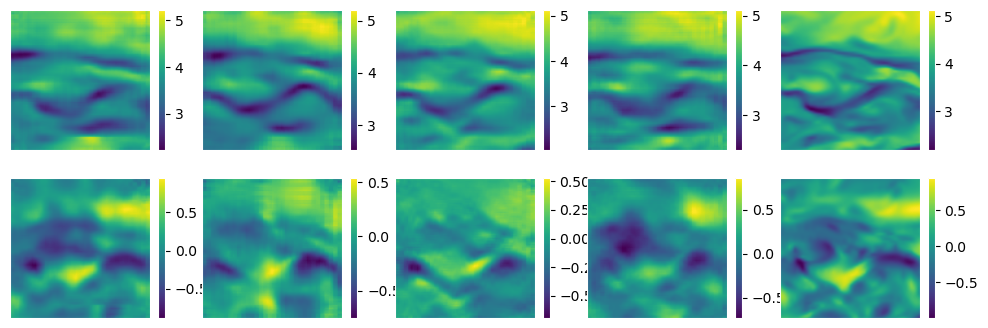

In [4]:
baseline_1 = MultiMethod(datas_multimodel[0], 0)
print(datas_multimodel[0])
baseline_1.show()
# sigma_u, sigma_v = baseline_1.std(show=1)
# sigma_u_t, sigma_v_t = baseline_1.std_truth(show=1)
uncertainty_u_mm, uncertainty_v_mm = baseline_1.uncertainty(show=0)

detransform has competed
/home/panding/code/UR/piv-data/baseline-multitransform/SQG_01395.npy


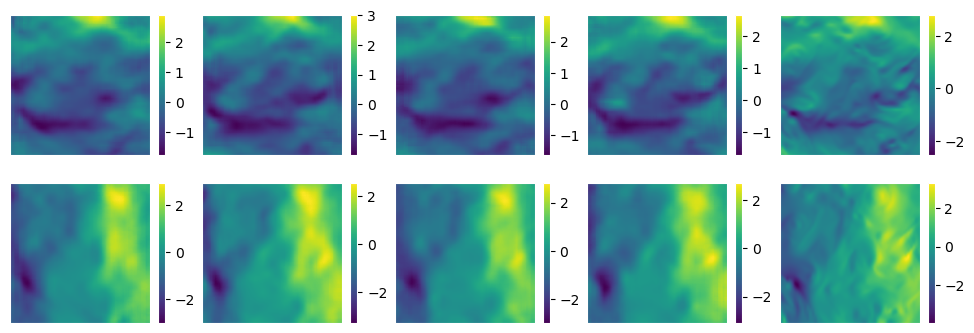

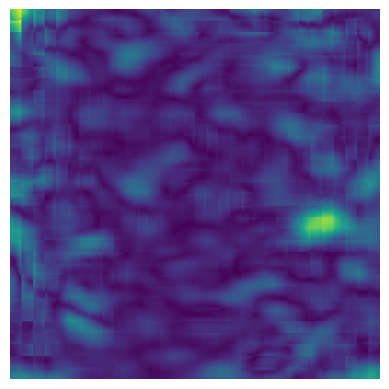

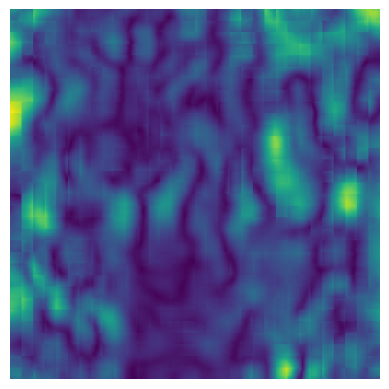

In [5]:
data_path_multitransform = '/home/panding/code/UR/piv-data/baseline-multitransform'
datas_multitransform = glob.glob(os.path.join(data_path_multitransform, '*.npy'))
datas_multitransform = sorted(datas_multitransform)
randomidx = np.random.permutation(len(datas_multimodel))
datas_multitransform = [datas_multitransform[i] for i in randomidx]
data_special = '/home/panding/code/UR/piv-data/baseline-multitransform/JHTDB_isotropic1024_hd_01894.npy'
baseline_2 = MultiMethod(data_special, 1)
print(datas_multitransform[0])
baseline_2.show()
# sigma_u, sigma_v = baseline_2.std(show=1)
# sigma_u_t, sigma_v_t = baseline_2.std_truth(show=1)
uncertainty_u_mt, uncertainty_v_mt = baseline_2.uncertainty(show=0)
# print(uncertainty_u_mt.shape)

plt.figure(facecolor='white')
plt.imshow(uncertainty_u_mt)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('/home/panding/code/UR/fig2/ur_u.png', bbox_inches='tight',pad_inches = 0)
plt.show()

plt.figure(facecolor='white')
plt.imshow(uncertainty_v_mt)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('/home/panding/code/UR/fig2/ur_v.png', bbox_inches='tight',pad_inches = 0)
plt.show()

In [6]:
def detransform(data):
    
    data[2] = np.flip(data[2], 0)
    data[3] = np.negative(np.flip(data[3], 0))
    
    data[4] = np.rot90(np.negative(data[4]), k=2, axes=(0, 1))
    data[5] = np.rot90(np.negative(data[5]), k=2, axes=(0, 1))

    data[6] = np.negative(np.flip(data[6], 1))
    data[7] = np.flip(data[7], 1)

    # self.data[4] = np.negative(np.flip(self.data[4], 1))
    # self.data[5] = np.flip(self.data[5], 1)
    # self.data[6] = np.negative(np.flip(np.flip(self.data[6], 1), 0))
    # self.data[7] = np.negative(np.flip(np.flip(self.data[7], 1), 0))
    return data

(10, 256, 256)


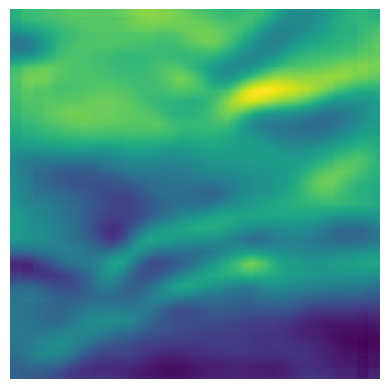

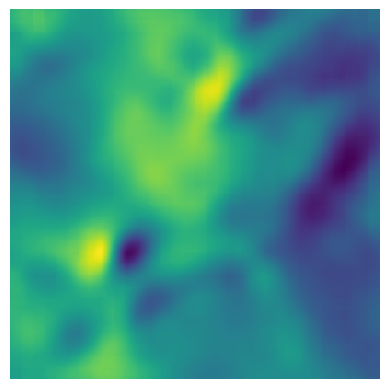

In [7]:
# data_path_multimodel = '/home/panding/code/UR/piv-data/baseline-multimodel'
# datas_multimodel = glob.glob(os.path.join(data_path_multimodel, '*.npy'))
# datas_multimodel = sorted(datas_multimodel)
# randomidx = np.random.permutation(len(datas_multimodel))
# datas_multimodel = [datas_multimodel[i] for i in randomidx]

# data = np.load(datas_multimodel[0])
# print(datas_multimodel[0])

data = np.load('/home/panding/code/UR/piv-data/baseline-multitransform/JHTDB_isotropic1024_hd_01860.npy')
print(data.shape)
data = detransform(data)
save_path = '/home/panding/code/UR/fig2/'

avg_u = (data[0] + data[2] + data[4] + data[6])/4
avg_v = (data[1] + data[3] + data[5] + data[7])/4

plt.figure(facecolor='white')
plt.imshow(avg_u)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('/home/panding/code/UR/fig2/avg_u.png', bbox_inches='tight',pad_inches = 0)
plt.show()

plt.figure(facecolor='white')
plt.imshow(avg_v)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('/home/panding/code/UR/fig2/avg_v.png', bbox_inches='tight',pad_inches = 0)
plt.show()

# for i in range(0, 10):
#     plt.figure(facecolor='white')
#     plt.imshow(data[i])
#     plt.xticks([])
#     plt.yticks([])
#     plt.axis('off')
#     save_path = save_path + str(i) + '.png'
#     # print(save_path)
#     plt.savefig(save_path, bbox_inches='tight',pad_inches = 0)
#     plt.show()
#     save_path = '/home/panding/code/UR/fig2/'
        

# plt.figure(facecolor='white')
# plt.imshow(data_img1)
# plt.xticks([])
# plt.yticks([])
# plt.axis('off')
# plt.savefig('/home/panding/code/UR/fig1/res1.png', bbox_inches='tight',pad_inches = 0)
# plt.show()
